In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/manishtripathi86/fedex-data")

Skipping, found downloaded files in "./fedex-data" (use force=True to force download)


In [ ]:
import os

print(os.listdir("./fedex-data"))

['fedex.csv']


In [ ]:
file_path = "./fedex-data/fedex.csv"
df = pd.read_csv(file_path)
display(df.head())

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [ ]:
df.isnull().sum()

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
Actual_Shipment_Time,81602
Planned_Shipment_Time,0
Planned_Delivery_Time,0
Carrier_Name,0
Carrier_Num,0
Planned_TimeofTravel,547


**DATA GAPS**<br>
Based on the analysis of missing values , the following columns exhibit data gaps:

*   **`Actual_Shipment_Time`**: 81602 missing values
*   **`Planned_TimeofTravel`**: 547 missing values
*   **`Shipment_Delay`**: 81602 missing values
*   **`Delivery_Status`**: 81602 missing values

A notable observation is the identical count of missing values (81602) across `Actual_Shipment_Time`, `Shipment_Delay`, and `Delivery_Status`. This strong correlation in missingness suggests a potential dependency between these variables. It is possibility that if the `Actual_Shipment_Time` is not recorded, it consequently impacts the calculation of `Shipment_Delay` and the determination of `Delivery_Status`. This could indicate scenarios where shipments were not initiated or tracked properly, leading to these data gaps.

The `Planned_TimeofTravel` column has a smaller number of missing values (547). This could be attributed to different factors, such as instances where a planned travel time was not applicable or assigned, possibly for shipments that were not dispatched as initially planned.


In [ ]:
df.tail()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
3604170,2008,6,19,4,1059.0,1100,1256,DL,1547,236.0,-1.0,ATL,JAC,1572,0.0
3604171,2008,6,19,4,555.0,600,738,DL,1548,98.0,-5.0,RSW,ATL,515,0.0
3604172,2008,6,19,4,821.0,827,1003,DL,1548,96.0,-6.0,ATL,IND,432,0.0
3604173,2008,6,19,4,718.0,735,852,DL,1551,77.0,-17.0,CAE,ATL,191,0.0
3604174,2008,6,19,4,1127.0,951,1130,DL,1551,159.0,96.0,ATL,MSP,906,1.0


/tmp/ipython-input-904882293.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis', width=0.8) # Decreased width for spacing


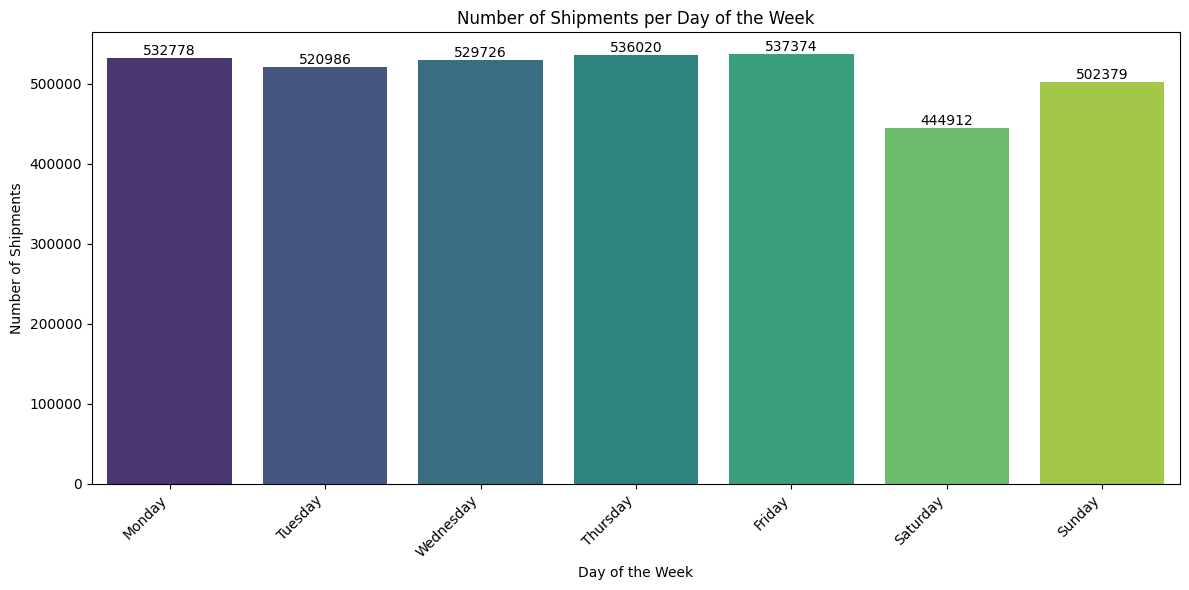

In [ ]:
import matplotlib.pyplot as plt

day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['Day_of_Week_Name'] = df['DayOfWeek'].map(day_map)


daily_counts = df['Day_of_Week_Name'].value_counts()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_counts = daily_counts.reindex(day_order)

import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis', width=0.8) 
plt.title('Number of Shipments per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/tmp/ipython-input-3098625504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_dayofmonth.values, y=top_5_dayofmonth.index, palette='magma', orient='h', width=0.8)


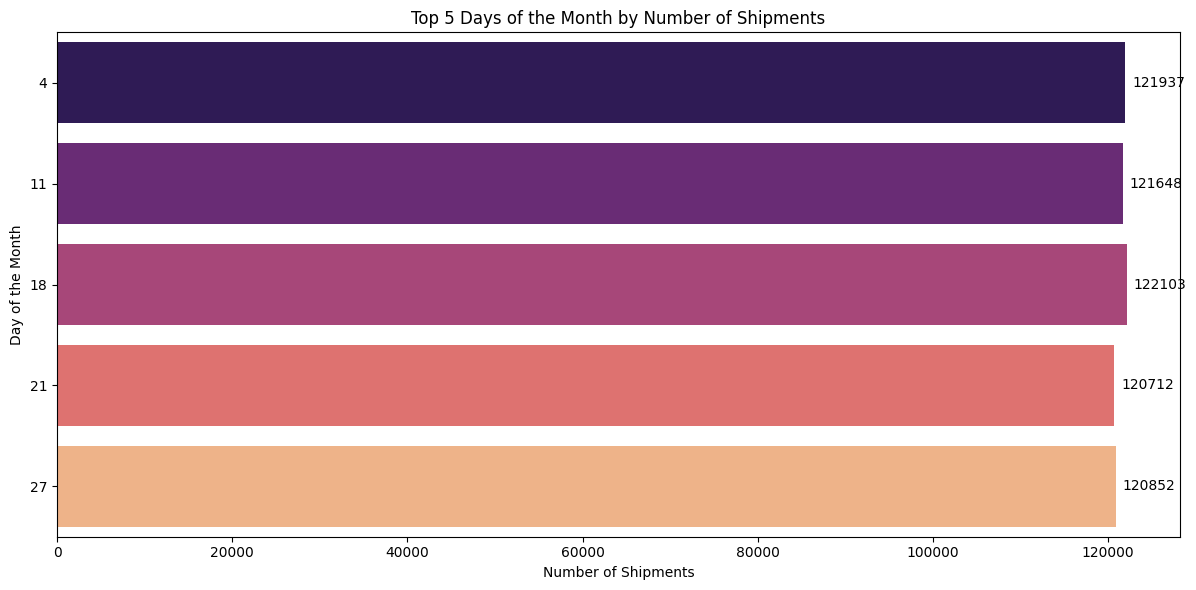

In [ ]:

dayofmonth_counts = df['DayofMonth'].value_counts()

top_5_dayofmonth = dayofmonth_counts.nlargest(5)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_5_dayofmonth.values, y=top_5_dayofmonth.index, palette='magma', orient='h', width=0.8)
plt.title('Top 5 Days of the Month by Number of Shipments')
plt.xlabel('Number of Shipments')
plt.ylabel('Day of the Month')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

**Inference:** This horizontal bar plot shows the top 5 days of the month with the highest shipment volumes.

/tmp/ipython-input-3806828456.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bottom_5_dayofmonth.values, y=bottom_5_dayofmonth.index, palette='viridis', orient='h', width=0.8)


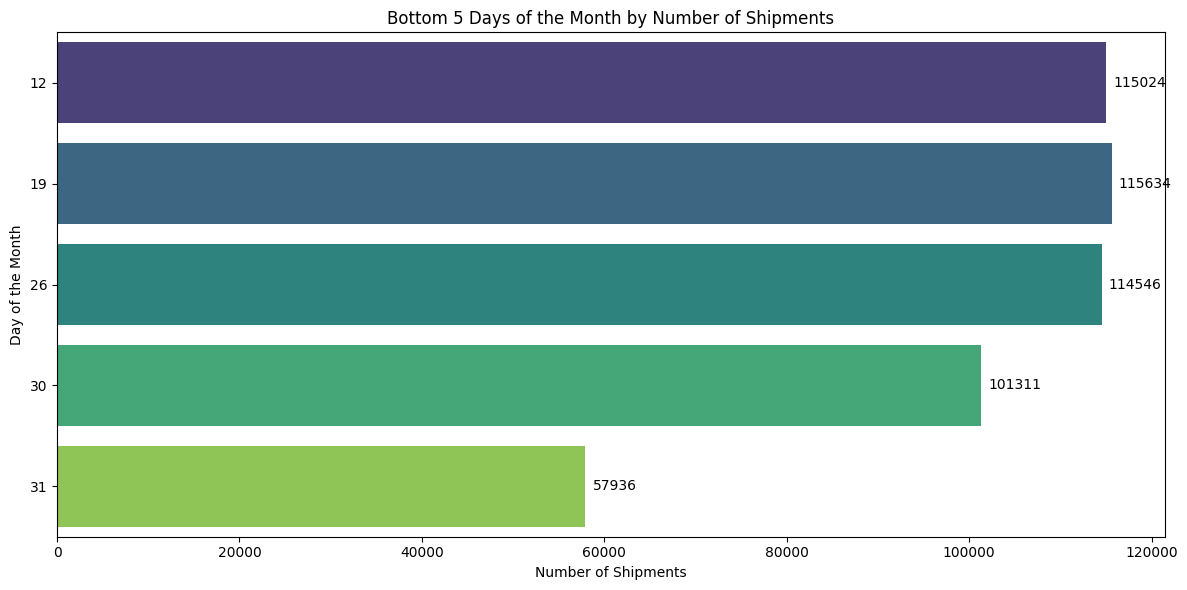

In [ ]:

dayofmonth_counts = df['DayofMonth'].value_counts()

bottom_5_dayofmonth = dayofmonth_counts.nsmallest(5)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bottom_5_dayofmonth.values, y=bottom_5_dayofmonth.index, palette='viridis', orient='h', width=0.8)
plt.title('Bottom 5 Days of the Month by Number of Shipments')
plt.xlabel('Number of Shipments')
plt.ylabel('Day of the Month')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

/tmp/ipython-input-4122092187.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='plasma') # Changed palette


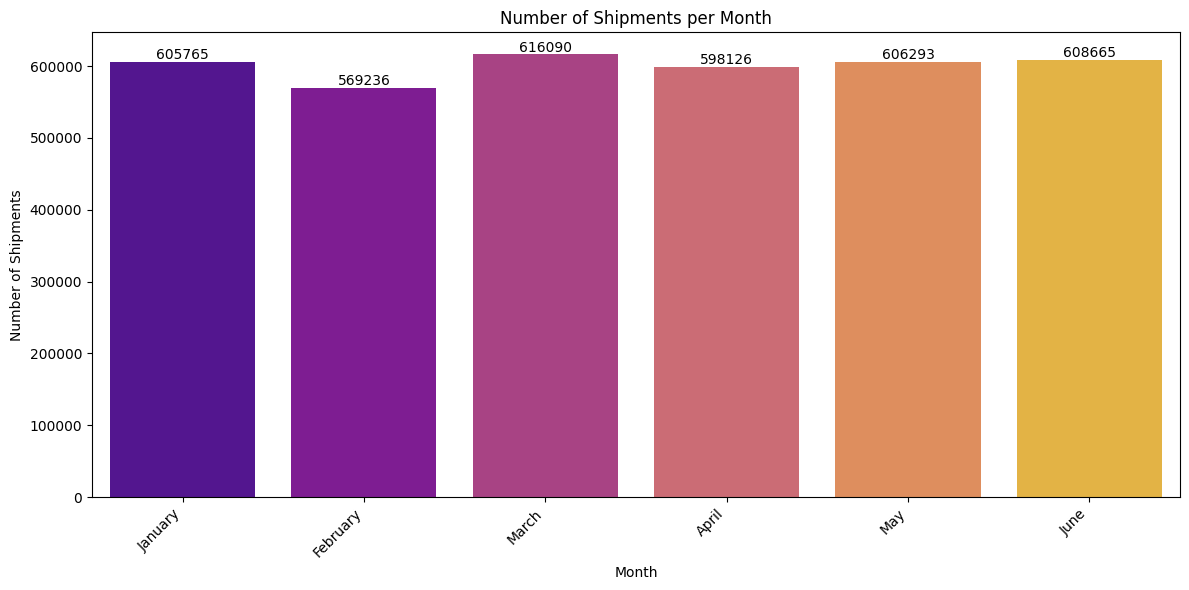

In [ ]:

import calendar
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[x])

monthly_counts = df['Month_Name'].value_counts()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_counts = monthly_counts.reindex(month_order).dropna()


import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='plasma') 
plt.title('Number of Shipments per Month')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Inference:** This bar plot shows the total number of shipments for each month across all years in the dataset. It helps to identify if there are any consistent monthly patterns or seasonality in the shipment volume, such as peak seasons or months with lower activity.

## Time and Demand Analysis

/tmp/ipython-input-3731812131.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_shipments = df.resample('M').size()


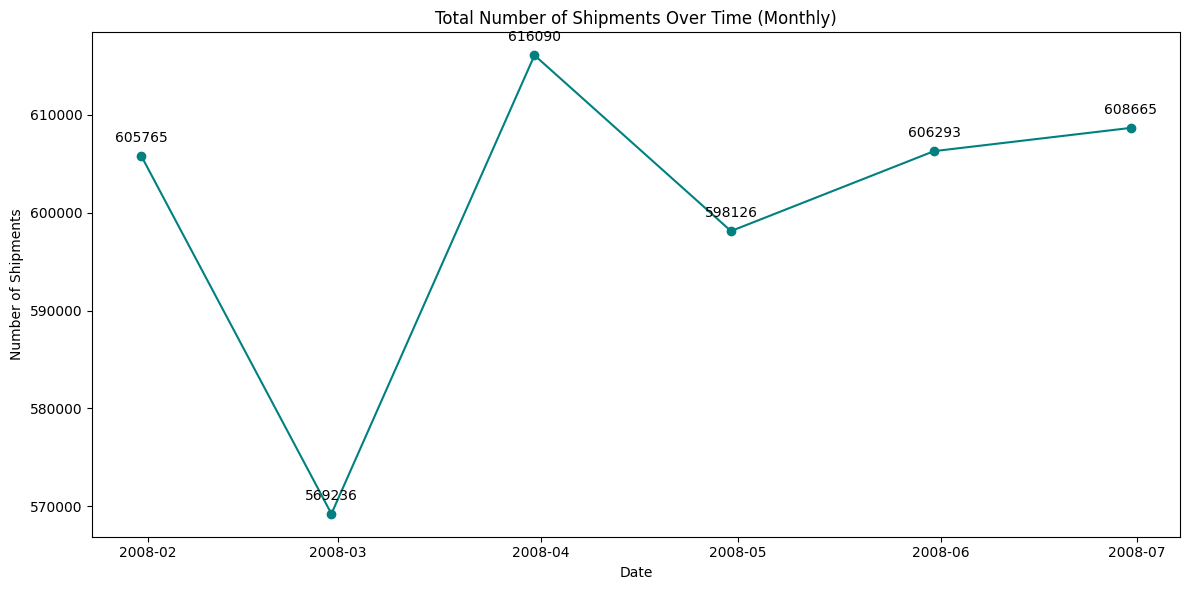

In [ ]:

file_path = "./fedex-data/fedex.csv"
df = pd.read_csv(file_path)

df['Shipment_Date'] = pd.to_datetime(df[['Year', 'Month', 'DayofMonth']].rename(columns={'Year': 'year', 'Month': 'month', 'DayofMonth': 'day'}))

df.set_index('Shipment_Date', inplace=True)

monthly_shipments = df.resample('M').size()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_shipments.index, monthly_shipments.values, marker='o', color='teal') 
plt.title('Total Number of Shipments Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Shipments')

plt.tight_layout()

for x, y in zip(monthly_shipments.index, monthly_shipments.values):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [ ]:

source_counts = df['Source'].value_counts()

destination_counts = df['Destination'].value_counts()

print("Number of unique Source locations:", len(source_counts))
print("Top 10 Source locations:\n", source_counts.head(10))

print("\nNumber of unique Destination locations:", len(destination_counts))
print("Top 10 Destination locations:\n", destination_counts.head(10))

Number of unique Source locations: 297
Top 10 Source locations:
 Source
ATL    207003
ORD    179274
DFW    141948
DEN    120500
LAX    111703
PHX    103833
IAH     94684
LAS     89523
DTW     84576
EWR     72717
Name: count, dtype: int64

Number of unique Destination locations: 299
Top 10 Destination locations:
 Destination
ATL    206935
ORD    179310
DFW    142013
DEN    120517
LAX    111749
PHX    103819
IAH     94665
LAS     89524
DTW     84571
EWR     72714
Name: count, dtype: int64


## Geographical Analysis

/tmp/ipython-input-1682578753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_source.index, y=top_5_source.values, palette='viridis')


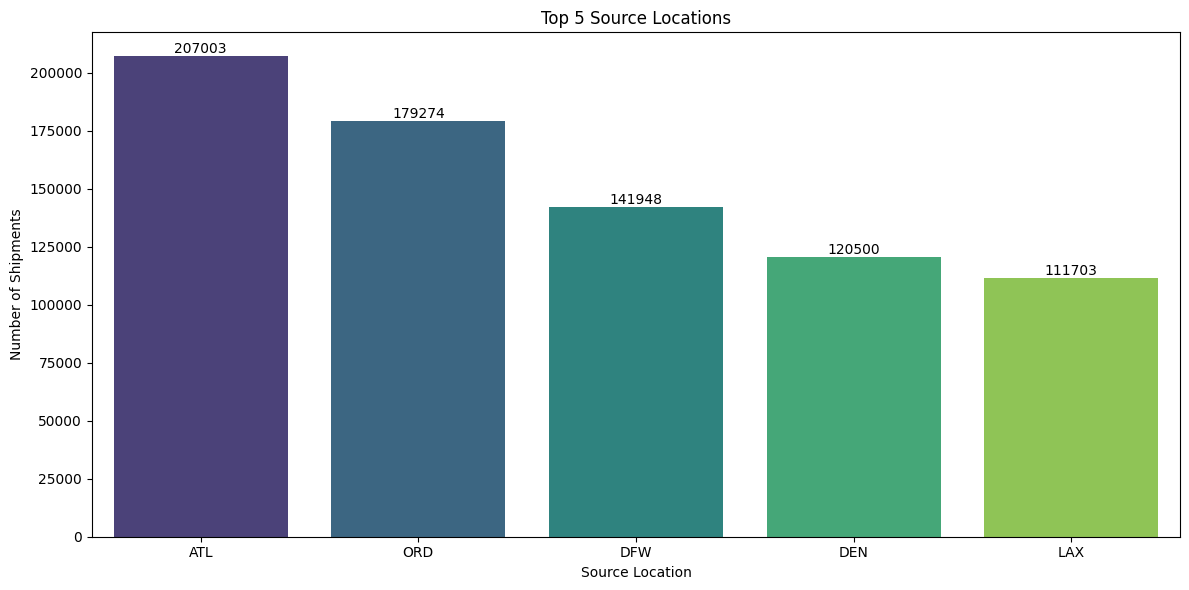

In [ ]:

top_5_source = df['Source'].value_counts().nlargest(5)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_5_source.index, y=top_5_source.values, palette='viridis')
plt.title('Top 5 Source Locations')
plt.xlabel('Source Location')
plt.ylabel('Number of Shipments')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/tmp/ipython-input-2657555613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bottom_5_source.index, y=bottom_5_source.values, palette='magma')


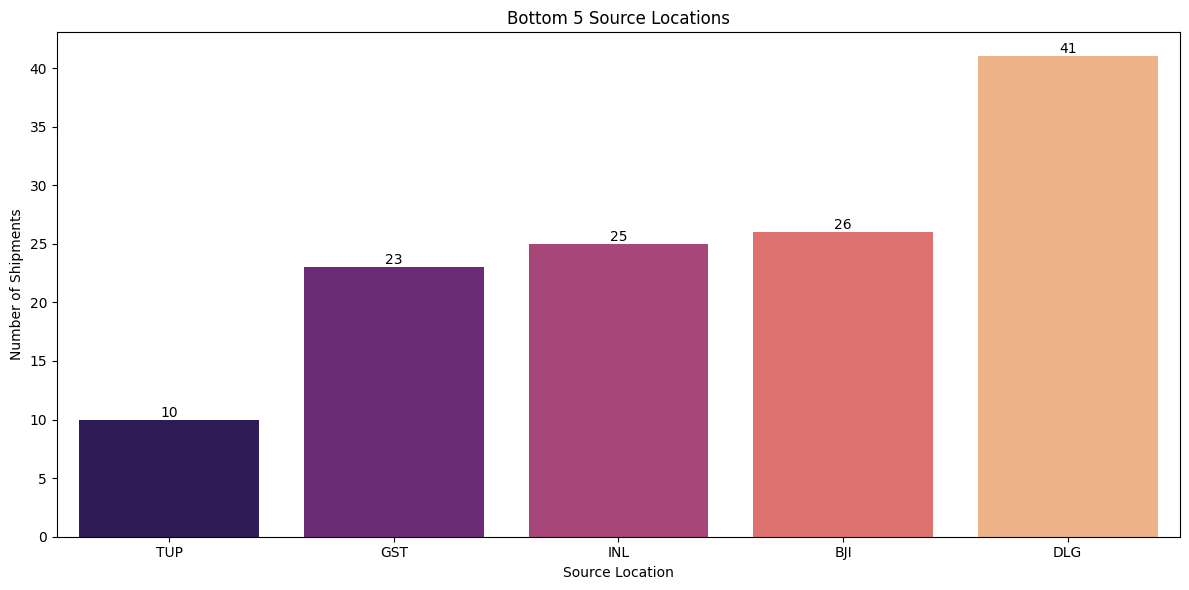

In [ ]:

bottom_5_source = df['Source'].value_counts().nsmallest(5)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bottom_5_source.index, y=bottom_5_source.values, palette='magma')
plt.title('Bottom 5 Source Locations')
plt.xlabel('Source Location')
plt.ylabel('Number of Shipments')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/tmp/ipython-input-608530136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_destination.index, y=top_5_destination.values, palette='viridis')


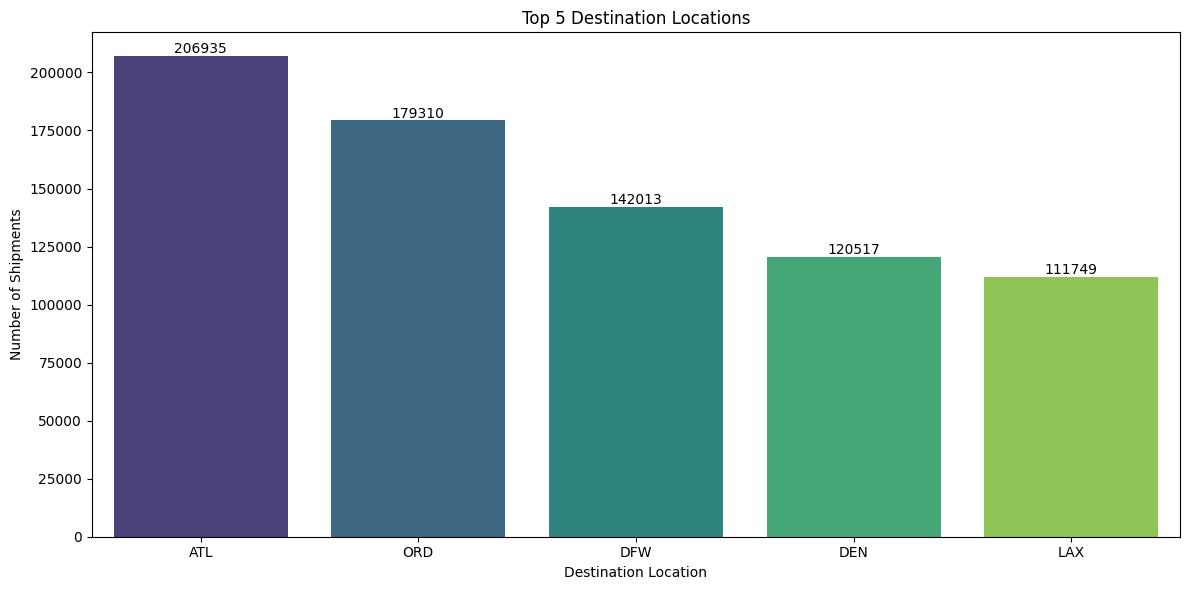

In [ ]:

top_5_destination = df['Destination'].value_counts().nlargest(5)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_5_destination.index, y=top_5_destination.values, palette='viridis')
plt.title('Top 5 Destination Locations')
plt.xlabel('Destination Location')
plt.ylabel('Number of Shipments')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/tmp/ipython-input-3342145403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bottom_5_destination.index, y=bottom_5_destination.values, palette='magma')


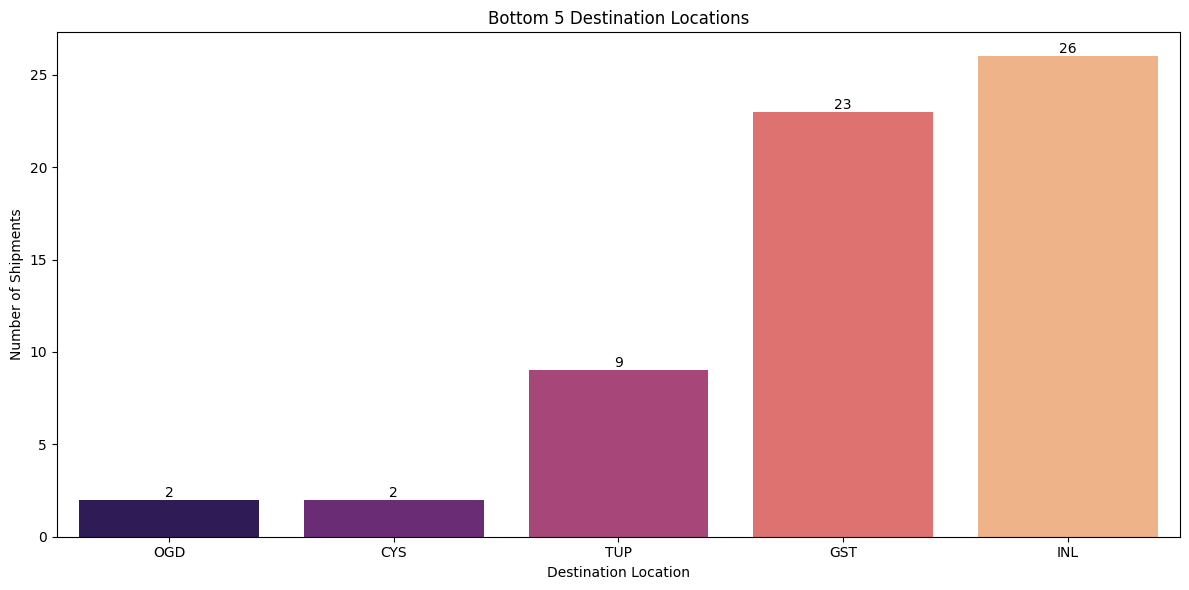

In [ ]:

bottom_5_destination = df['Destination'].value_counts().nsmallest(5)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bottom_5_destination.index, y=bottom_5_destination.values, palette='magma')
plt.title('Bottom 5 Destination Locations')
plt.xlabel('Destination Location')
plt.ylabel('Number of Shipments')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
unique_sources = df['Source'].unique()
unique_destinations = df['Destination'].unique()

print("Number of unique Source locations:", len(unique_sources))
print("Number of unique Destination locations:", len(unique_destinations))

Number of unique Source locations: 297
Number of unique Destination locations: 299


## Obtain geographical coordinates



In [ ]:

airports_df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header=None)

airports_df = airports_df[[4, 6, 7]]
airports_df.columns = ['IATA', 'Latitude', 'Longitude']

source_coordinates = {}
destination_coordinates = {}

for source_code in unique_sources:
    coord_row = airports_df[airports_df['IATA'] == source_code]
    if not coord_row.empty:
        source_coordinates[source_code] = (coord_row['Latitude'].iloc[0], coord_row['Longitude'].iloc[0])

for destination_code in unique_destinations:
    coord_row = airports_df[airports_df['IATA'] == destination_code]
    if not coord_row.empty:
        destination_coordinates[destination_code] = (coord_row['Latitude'].iloc[0], coord_row['Longitude'].iloc[0])

print("Source coordinates dictionary created.")
print("Destination coordinates dictionary created.")

Source coordinates dictionary created.
Destination coordinates dictionary created.


In [ ]:
source_data = []
for source_code, count in source_counts.items():
    if source_code in source_coordinates:
        lat, lon = source_coordinates[source_code]
        source_data.append({'Location': source_code, 'Latitude': lat, 'Longitude': lon, 'Shipment_Count': count})

source_df = pd.DataFrame(source_data)

destination_data = []
for destination_code, count in destination_counts.items():
    if destination_code in destination_coordinates:
        lat, lon = destination_coordinates[destination_code]
        destination_data.append({'Location': destination_code, 'Latitude': lat, 'Longitude': lon, 'Shipment_Count': count})

destination_df = pd.DataFrame(destination_data)

display(source_df.head())
display(destination_df.head())

,Location,Latitude,Longitude,Shipment_Count
0,ATL,33.636700,-84.428101,207003
1,ORD,41.978600,-87.904800,179274
2,DFW,32.896801,-97.038002,141948
3,DEN,39.861698,-104.672997,120500
4,LAX,33.942501,-118.407997,111703


,Location,Latitude,Longitude,Shipment_Count
0,ATL,33.636700,-84.428101,206935
1,ORD,41.978600,-87.904800,179310
2,DFW,32.896801,-97.038002,142013
3,DEN,39.861698,-104.672997,120517
4,LAX,33.942501,-118.407997,111749


In [ ]:
import folium
import numpy as np

center_lat = source_df['Latitude'].mean()
center_lon = source_df['Longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=4)

title_html = '<h3 align="center" style="font-weight: bold;">Source Locations by Shipment Count</h3>'
m.get_root().html.add_child(folium.Element(title_html))


max_shipment_count = source_df['Shipment_Count'].max()
min_shipment_count = source_df['Shipment_Count'].min()


for index, row in source_df.iterrows():
    radius = np.log(row['Shipment_Count'] + 1) * 2 

    opacity = (row['Shipment_Count'] - min_shipment_count) / (max_shipment_count - min_shipment_count) * 0.8 + 0.2 


    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=opacity, 
        tooltip=f"Source: {row['Location']}<br>Shipments: {row['Shipment_Count']}"
    ).add_to(m)

m

In [ ]:

center_lat = destination_df['Latitude'].mean()
center_lon = destination_df['Longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=4)

title_html = '<h3 align="center" style="font-weight: bold;">Destination Locations by Shipment Count</h3>'
m.get_root().html.add_child(folium.Element(title_html))


max_shipment_count = destination_df['Shipment_Count'].max()
min_shipment_count = destination_df['Shipment_Count'].min()

for index, row in destination_df.iterrows():
    radius = np.log(row['Shipment_Count'] + 1) * 2

    opacity = (row['Shipment_Count'] - min_shipment_count) / (max_shipment_count - min_shipment_count) * 0.8 + 0.2 

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='green',  
        fill=True,
        fill_color='green',  
        fill_opacity=opacity,  
        tooltip=f"Destination: {row['Location']}<br>Shipments: {row['Shipment_Count']}"  
    ).add_to(m)  

m

In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
Shipment_Date,,,,,,,,,,,,,,,
2008-01-03,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
2008-01-03,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2008-01-03,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
2008-01-03,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
2008-01-03,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


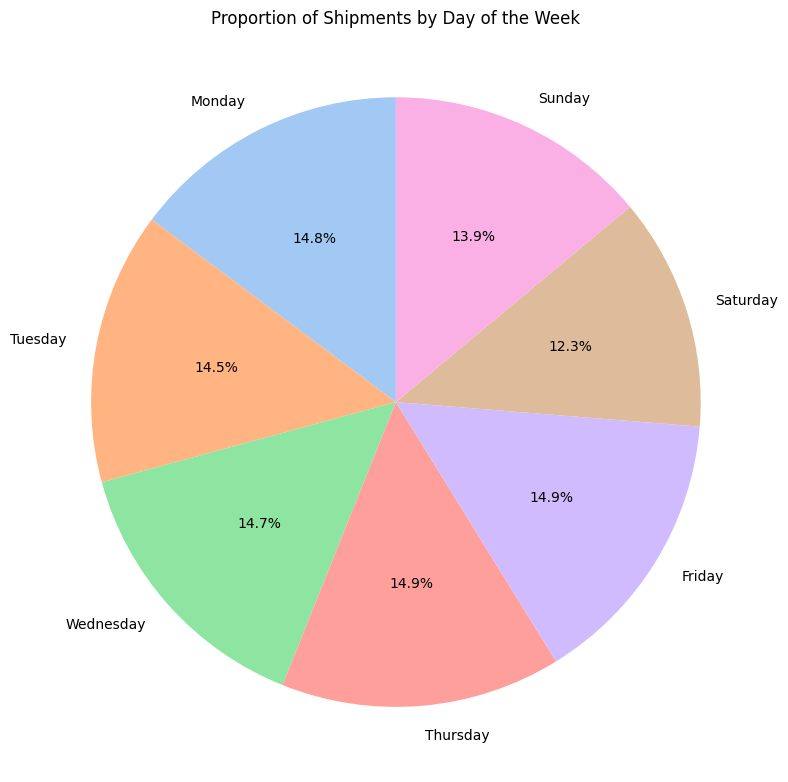

In [ ]:

daily_proportions = daily_counts / daily_counts.sum()

plt.figure(figsize=(8, 8))
plt.pie(daily_proportions, labels=daily_proportions.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Shipments by Day of the Week')
plt.axis('equal') 
plt.tight_layout()
plt.show()

**Reasoning**:
I need to calculate the actual delivery time. The `Actual_Shipment_Time`, `Planned_Shipment_Time`, and `Planned_Delivery_Time` columns appear to be in a 24-hour format without dates. I will convert these to minutes from midnight for a consistent time unit. Then, I'll calculate the planned travel time in minutes. If `Actual_Shipment_Time` is available, I can calculate the actual arrival time in minutes from midnight on the shipment day. If the planned delivery time is earlier than the planned shipment time, it implies the delivery is on the next day, so I need to adjust the planned delivery time accordingly. Finally, I'll calculate the actual delivery time relative to the planned shipment time and store it in a new column. Rows with missing `Actual_Shipment_Time` or `Planned_TimeofTravel` are crucial for this calculation, so I'll drop them first.



In [ ]:

df.dropna(subset=['Actual_Shipment_Time', 'Planned_TimeofTravel', 'Shipment_Delay', 'Delivery_Status'], inplace=True)

df['Actual_Shipment_Minutes'] = (df['Actual_Shipment_Time'] // 100) * 60 + (df['Actual_Shipment_Time'] % 100)
df['Planned_Shipment_Minutes'] = (df['Planned_Shipment_Time'] // 100) * 60 + (df['Planned_Shipment_Time'] % 100)
df['Planned_Delivery_Minutes'] = (df['Planned_Delivery_Time'] // 100) * 60 + (df['Planned_Delivery_Time'] % 100)

df['Planned_Travel_Minutes'] = df['Planned_TimeofTravel']

df['Actual_Arrival_Minutes'] = df['Actual_Shipment_Minutes'] + df['Planned_Travel_Minutes']

df['Actual_Delivery_Time'] = df['Actual_Arrival_Minutes'].copy()
df.loc[df['Planned_Delivery_Minutes'] < df['Planned_Shipment_Minutes'], 'Actual_Delivery_Time'] = df.loc[df['Planned_Delivery_Minutes'] < df['Planned_Shipment_Minutes'], 'Actual_Arrival_Minutes'] - 1440 

display(df[['Actual_Shipment_Time', 'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Actual_Shipment_Minutes', 'Planned_Shipment_Minutes', 'Planned_Delivery_Minutes', 'Planned_Travel_Minutes', 'Actual_Arrival_Minutes', 'Actual_Delivery_Time']].head())

,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Actual_Shipment_Minutes,Planned_Shipment_Minutes,Planned_Delivery_Minutes,Planned_Travel_Minutes,Actual_Arrival_Minutes,Actual_Delivery_Time
Shipment_Date,,,,,,,,,
2008-01-03,2003.0,1955,2225,1203.0,1195,1345,150.0,1353.0,1353.0
2008-01-03,754.0,735,1000,474.0,455,600,145.0,619.0,619.0
2008-01-03,628.0,620,750,388.0,380,470,90.0,478.0,478.0
2008-01-03,926.0,930,1100,566.0,570,660,90.0,656.0,656.0
2008-01-03,1829.0,1755,1925,1109.0,1075,1165,90.0,1199.0,1199.0


## Calculate average delivery time per destination



In [ ]:
average_delivery_time_per_destination = df.groupby('Destination')['Actual_Delivery_Time'].mean()
display(average_delivery_time_per_destination.head())

,Actual_Delivery_Time
Destination,
ABE,1081.010314
ABI,1064.657187
ABQ,941.751538
ABY,986.151304
ACK,883.487805


In [ ]:
top_5_best_delivery_time = average_delivery_time_per_destination.nsmallest(5)
bottom_5_worst_delivery_time = average_delivery_time_per_destination.nlargest(5)

print("Top 5 destinations with the best (lowest) average delivery time:")
display(top_5_best_delivery_time)

print("\nTop 5 destinations with the worst (highest) average delivery time:")
display(bottom_5_worst_delivery_time)

Top 5 destinations with the best (lowest) average delivery time:


,Actual_Delivery_Time
Destination,
PSE,-235.850000
DHN,315.063676
BQN,443.903394
IPL,602.445131
TEX,724.240876



Top 5 destinations with the worst (highest) average delivery time:


,Actual_Delivery_Time
Destination,
BLI,1400.107438
ALO,1395.083333
INL,1383.160000
CMX,1334.552239
SCE,1321.819728


In [ ]:

top_bottom_delivery_time_df = pd.concat([top_5_best_delivery_time, bottom_5_worst_delivery_time], axis=0).to_frame()

top_bottom_delivery_time_transposed = top_bottom_delivery_time_df.T

top_bottom_delivery_time_transposed.index = ['Average_Delivery_Time']

display(top_bottom_delivery_time_transposed)

Destination,PSE,DHN,BQN,IPL,TEX,BLI,ALO,INL,CMX,SCE
Average_Delivery_Time,-235.85,315.063676,443.903394,602.445131,724.240876,1400.107438,1395.083333,1383.16,1334.552239,1321.819728


## Analyze delayed shipments by day of the week



**Reasoning**:
I need to determine the number of delayed shipments for each day of the week using the `DayOfWeek` column and the `Shipment_Delay` column. I will filter the DataFrame to include only rows where `Shipment_Delay` is greater than 0, group by `DayOfWeek`, count the occurrences, map the integer day of the week to day names, and reindex according to the desired order.



In [ ]:

delayed_df = df[df['Shipment_Delay'] > 0].copy()

delayed_shipments_by_day = delayed_df['DayOfWeek'].value_counts()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
delayed_shipments_by_day.index = delayed_shipments_by_day.index.map(day_map)

delayed_shipments_by_day = delayed_shipments_by_day.reindex(day_order).fillna(0)

display(delayed_shipments_by_day)

,count
DayOfWeek,
Monday,220519
Tuesday,197881
Wednesday,202967
Thursday,226372
Friday,250737
Saturday,173655
Sunday,212852


/tmp/ipython-input-2885496841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=delayed_shipments_by_day.index, y=delayed_shipments_by_day.values, palette='rocket', width=0.8)


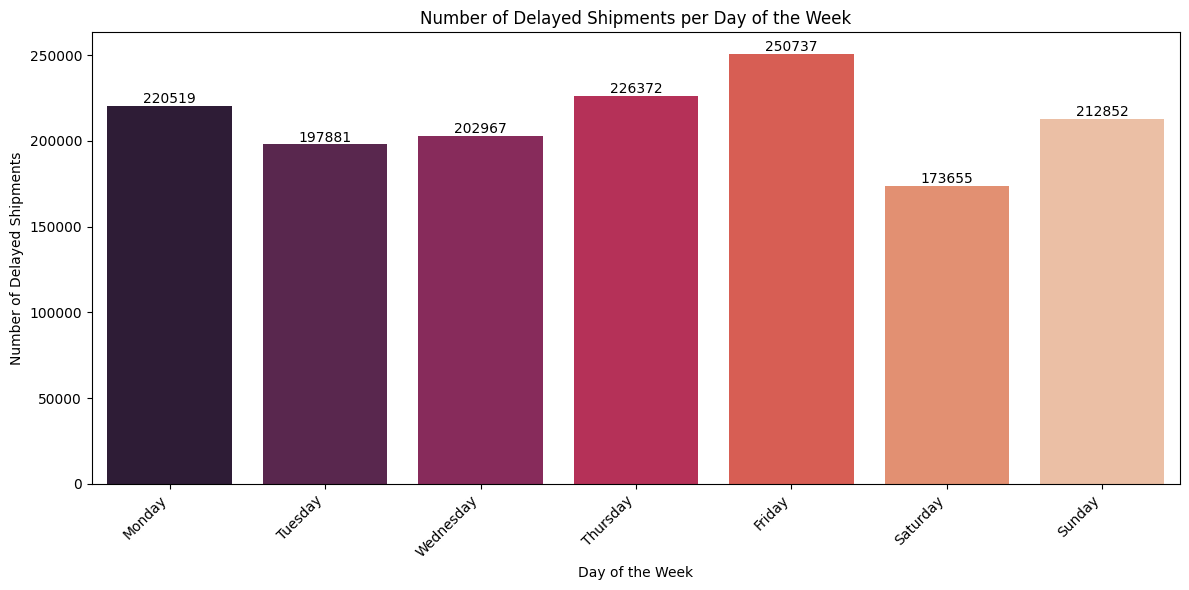

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=delayed_shipments_by_day.index, y=delayed_shipments_by_day.values, palette='rocket', width=0.8)
plt.title('Number of Delayed Shipments per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Delayed Shipments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Identify top/bottom places by delayed shipments




In [ ]:

delayed_df = df[df['Shipment_Delay'] > 0].copy()

delayed_source_counts = delayed_df['Source'].value_counts()

top_5_delayed_sources = delayed_source_counts.nlargest(5)

bottom_5_delayed_sources = delayed_source_counts.nsmallest(5)

delayed_destination_counts = delayed_df['Destination'].value_counts()

top_5_delayed_destinations = delayed_destination_counts.nlargest(5)

bottom_5_delayed_destinations = delayed_destination_counts.nsmallest(5)

print("Top 5 Source Locations with Most Delayed Shipments:")
display(top_5_delayed_sources)

print("\nBottom 5 Source Locations with Least Delayed Shipments:")
display(bottom_5_delayed_sources)

print("\nTop 5 Destination Locations with Most Delayed Shipments:")
display(top_5_delayed_destinations)

print("\nBottom 5 Destination Locations with Least Delayed Shipments:")
display(bottom_5_delayed_destinations)

Top 5 Source Locations with Most Delayed Shipments:


,count
Source,
ORD,91017
ATL,88793
DFW,68646
DEN,55572
LAX,49716



Bottom 5 Source Locations with Least Delayed Shipments:


,count
Source,
TUP,1
INL,1
BJI,2
WYS,4
BLI,9



Top 5 Destination Locations with Most Delayed Shipments:


,count
Destination,
ORD,78325
ATL,72042
DFW,53379
LAX,48715
DEN,48079



Bottom 5 Destination Locations with Least Delayed Shipments:


,count
Destination,
OGD,1
TUP,1
CYS,1
BJI,7
INL,8


In [ ]:

df.dropna(subset=['Actual_Shipment_Time', 'Planned_TimeofTravel', 'Shipment_Delay', 'Delivery_Status'], inplace=True)

df['Actual_Shipment_Minutes'] = (df['Actual_Shipment_Time'] // 100) * 60 + (df['Actual_Shipment_Time'] % 100)
df['Planned_Shipment_Minutes'] = (df['Planned_Shipment_Time'] // 100) * 60 + (df['Planned_Shipment_Time'] % 100)
df['Planned_Delivery_Minutes'] = (df['Planned_Delivery_Time'] // 100) * 60 + (df['Planned_Delivery_Time'] % 100)

df['Planned_Travel_Minutes'] = df['Planned_TimeofTravel']

df['Actual_Arrival_Minutes'] = df['Actual_Shipment_Minutes'] + df['Planned_Travel_Minutes']

df['Actual_Delivery_Time'] = df['Actual_Arrival_Minutes'].copy()
df.loc[df['Planned_Delivery_Minutes'] < df['Planned_Shipment_Minutes'], 'Actual_Delivery_Time'] = df.loc[df['Planned_Delivery_Minutes'] < df['Planned_Shipment_Minutes'], 'Actual_Arrival_Minutes'] - 1440 # Subtract 24 hours in minutes if crossing midnight

display(df[['Actual_Shipment_Time', 'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Actual_Shipment_Minutes', 'Planned_Shipment_Minutes', 'Planned_Delivery_Minutes', 'Planned_Travel_Minutes', 'Actual_Arrival_Minutes', 'Actual_Delivery_Time']].head())

,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Actual_Shipment_Minutes,Planned_Shipment_Minutes,Planned_Delivery_Minutes,Planned_Travel_Minutes,Actual_Arrival_Minutes,Actual_Delivery_Time
Shipment_Date,,,,,,,,,
2008-01-03,2003.0,1955,2225,1203.0,1195,1345,150.0,1353.0,1353.0
2008-01-03,754.0,735,1000,474.0,455,600,145.0,619.0,619.0
2008-01-03,628.0,620,750,388.0,380,470,90.0,478.0,478.0
2008-01-03,926.0,930,1100,566.0,570,660,90.0,656.0,656.0
2008-01-03,1829.0,1755,1925,1109.0,1075,1165,90.0,1199.0,1199.0


## Prepare data for radar chart (delayed percentage)



In [ ]:

destination_shipment_counts = df.groupby('Destination').agg(
    Total_Shipments=('Shipment_Delay', 'size'),
    Delayed_Shipments=('Shipment_Delay', lambda x: (x > 0).sum())
)

destination_delay_percentages = (destination_shipment_counts['Delayed_Shipments'] / destination_shipment_counts['Total_Shipments']) * 100

top_5_delayed_percentage = destination_delay_percentages.nlargest(5)

bottom_5_delayed_percentage = destination_delay_percentages.nsmallest(5)

print("Top 5 destinations with the highest delayed shipment percentage:")
display(top_5_delayed_percentage)

print("\nTop 5 destinations with the lowest delayed shipment percentage:")
display(bottom_5_delayed_percentage)

Top 5 destinations with the highest delayed shipment percentage:


,0
Destination,
GST,65.217391
HRL,63.331804
MQT,59.740260
MAF,58.478199
HOU,57.598304



Top 5 destinations with the lowest delayed shipment percentage:


,0
Destination,
TUP,11.111111
FLG,13.127854
SLE,17.220544
TEX,18.248175
ITO,18.443233


## Calculate delayed shipment percentage per destination



In [ ]:

top_bottom_delayed_destinations_list = top_5_delayed_percentage.index.tolist() + bottom_5_delayed_percentage.index.tolist()

destination_comparison_df = df[df['Destination'].isin(top_bottom_delayed_destinations_list)].copy()

destination_comparison_df = destination_comparison_df.groupby('Destination').agg(
    Total_Shipments=('Shipment_Delay', 'size'),
    Delayed_Shipments=('Shipment_Delay', lambda x: (x > 0).sum())
).reset_index()

top_bottom_delayed_sources_list = top_5_delayed_sources.index.tolist() + bottom_5_delayed_sources.index.tolist()
source_comparison_df = df[df['Source'].isin(top_bottom_delayed_sources_list)].copy()
source_comparison_df = source_comparison_df.groupby('Source').agg(
    Total_Shipments=('Shipment_Delay', 'size'),
    Delayed_Shipments=('Shipment_Delay', lambda x: (x > 0).sum())
).reset_index()


display(source_comparison_df.head())
display(destination_comparison_df.head())

,Source,Total_Shipments,Delayed_Shipments
0,ATL,203756,88793
1,BJI,25,2
2,BLI,119,9
3,DEN,118911,55572
4,DFW,136553,68646


,Destination,Total_Shipments,Delayed_Shipments
0,FLG,876,115
1,GST,23,15
2,HOU,27822,16025
3,HRL,2179,1380
4,ITO,4034,744


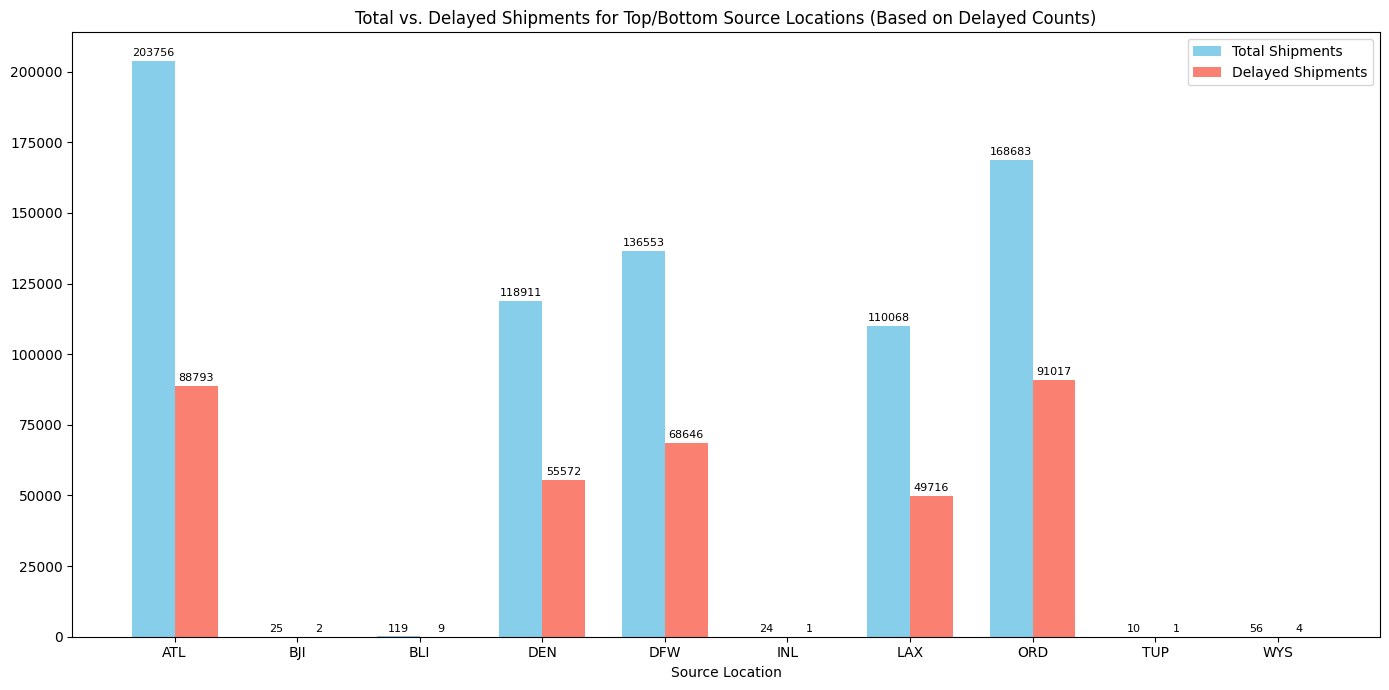

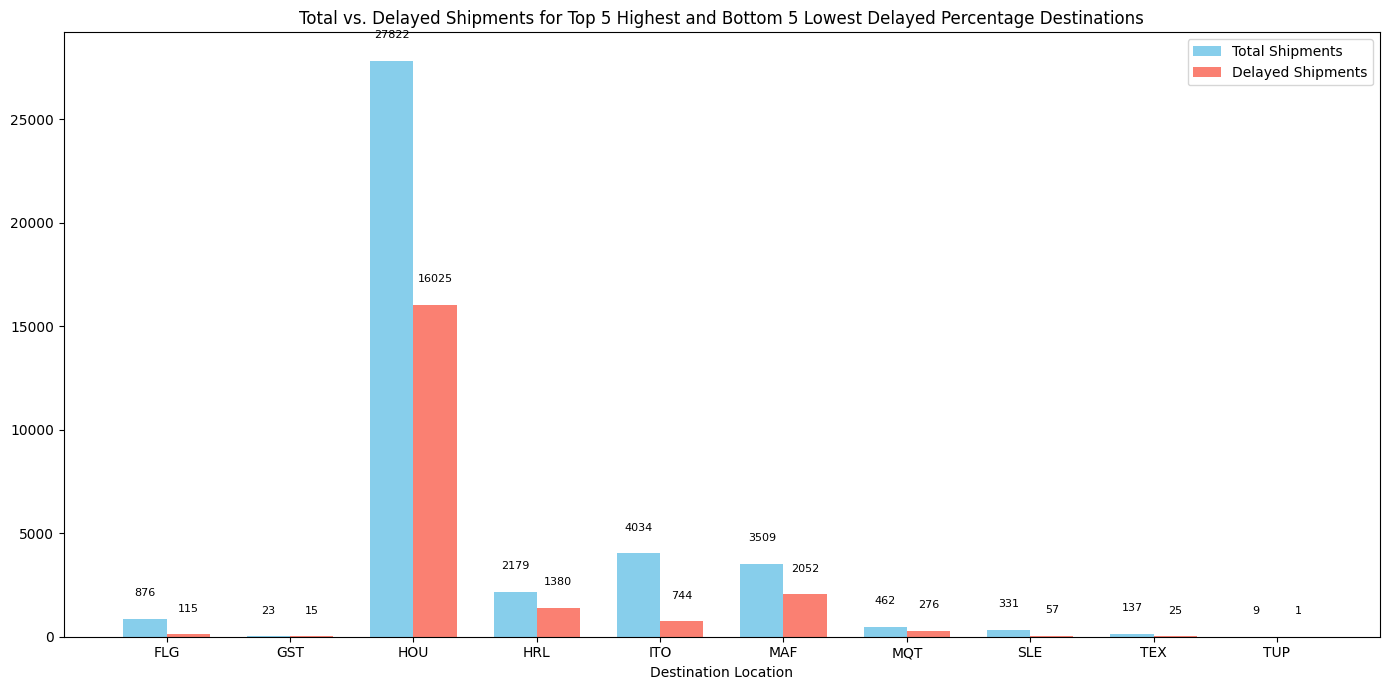

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.35
index = np.arange(len(source_comparison_df))

bar1 = ax.bar(index, source_comparison_df['Total_Shipments'], bar_width, label='Total Shipments', color='skyblue')
bar2 = ax.bar(index + bar_width, source_comparison_df['Delayed_Shipments'], bar_width, label='Delayed Shipments', color='salmon')

ax.set_xlabel('Source Location')
ax.set_title('Total vs. Delayed Shipments for Top/Bottom Source Locations (Based on Delayed Counts)') # Clarified title
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(source_comparison_df['Source'])
ax.legend()

for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{yval:.0f}', ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14, 7))

index = np.arange(len(destination_comparison_df))

bar1 = ax.bar(index, destination_comparison_df['Total_Shipments'], bar_width, label='Total Shipments', color='skyblue')
bar2 = ax.bar(index + bar_width, destination_comparison_df['Delayed_Shipments'], bar_width, label='Delayed Shipments', color='salmon')

ax.set_xlabel('Destination Location')
ax.set_title('Total vs. Delayed Shipments for Top 5 Highest and Bottom 5 Lowest Delayed Percentage Destinations') # Modified title for clarity
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(destination_comparison_df['Destination'])
ax.legend()

for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{yval:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:

top_bottom_delayed_destinations_list = top_5_delayed_percentage.index.tolist() + bottom_5_delayed_percentage.index.tolist()

destination_comparison_df = df[df['Destination'].isin(top_bottom_delayed_destinations_list)].copy()

destination_comparison_df = destination_comparison_df.groupby('Destination').agg(
    Total_Shipments=('Shipment_Delay', 'size'),
    Delayed_Shipments=('Shipment_Delay', lambda x: (x > 0).sum())
).reset_index()

top_bottom_delayed_sources_list = top_5_delayed_sources.index.tolist() + bottom_5_delayed_sources.index.tolist()
source_comparison_df = df[df['Source'].isin(top_bottom_delayed_sources_list)].copy()
source_comparison_df = source_comparison_df.groupby('Source').agg(
    Total_Shipments=('Shipment_Delay', 'size'),
    Delayed_Shipments=('Shipment_Delay', lambda x: (x > 0).sum())
).reset_index()


display(source_comparison_df.head())
display(destination_comparison_df.head())

,Source,Total_Shipments,Delayed_Shipments
0,ATL,203756,88793
1,BJI,25,2
2,BLI,119,9
3,DEN,118911,55572
4,DFW,136553,68646


,Destination,Total_Shipments,Delayed_Shipments
0,FLG,876,115
1,GST,23,15
2,HOU,27822,16025
3,HRL,2179,1380
4,ITO,4034,744


## Identify top/bottom places by delayed shipments



In [ ]:
delayed_df = df[df['Shipment_Delay'] > 0].copy()

delayed_source_counts = delayed_df['Source'].value_counts()

top_5_delayed_sources = delayed_source_counts.nlargest(5)

bottom_5_delayed_sources = delayed_source_counts.nsmallest(5)

delayed_destination_counts = delayed_df['Destination'].value_counts()

top_5_delayed_destinations = delayed_destination_counts.nlargest(5)

bottom_5_delayed_destinations = delayed_destination_counts.nsmallest(5)

print("Top 5 Source Locations with Most Delayed Shipments:")
display(top_5_delayed_sources)

print("\nBottom 5 Source Locations with Least Delayed Shipments:")
display(bottom_5_delayed_sources)

print("\nTop 5 Destination Locations with Most Delayed Shipments:")
display(top_5_delayed_destinations)

print("\nBottom 5 Destination Locations with Least Delayed Shipments:")
display(bottom_5_delayed_destinations)

Top 5 Source Locations with Most Delayed Shipments:


,count
Source,
ORD,91017
ATL,88793
DFW,68646
DEN,55572
LAX,49716



Bottom 5 Source Locations with Least Delayed Shipments:


,count
Source,
TUP,1
INL,1
BJI,2
WYS,4
BLI,9



Top 5 Destination Locations with Most Delayed Shipments:


,count
Destination,
ORD,78325
ATL,72042
DFW,53379
LAX,48715
DEN,48079



Bottom 5 Destination Locations with Least Delayed Shipments:


,count
Destination,
OGD,1
TUP,1
CYS,1
BJI,7
INL,8


## Analyze delayed shipments by day of the week



In [ ]:

delayed_df = df[df['Shipment_Delay'] > 0].copy()

delayed_shipments_by_day = delayed_df['DayOfWeek'].value_counts()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
delayed_shipments_by_day.index = delayed_shipments_by_day.index.map(day_map)

delayed_shipments_by_day = delayed_shipments_by_day.reindex(day_order).fillna(0)

display(delayed_shipments_by_day)

,count
DayOfWeek,
Monday,220519
Tuesday,197881
Wednesday,202967
Thursday,226372
Friday,250737
Saturday,173655
Sunday,212852


In [ ]:

top_bottom_delayed_percentage_df = pd.concat([top_5_delayed_percentage, bottom_5_delayed_percentage], axis=0).to_frame()

top_bottom_delayed_percentage_transposed = top_bottom_delayed_percentage_df.T

top_bottom_delayed_percentage_transposed.index = ['Delayed_Percentage']

display(top_bottom_delayed_percentage_transposed)

Destination,GST,HRL,MQT,MAF,HOU,TUP,FLG,SLE,TEX,ITO
Delayed_Percentage,65.217391,63.331804,59.74026,58.478199,57.598304,11.111111,13.127854,17.220544,18.248175,18.443233


## Identify Top/Bottom Destinations by Delayed Shipment Percentage


In [ ]:

top_5_delayed_percentage = destination_delay_percentages.nlargest(5)

bottom_5_delayed_percentage = destination_delay_percentages.nsmallest(5)

print("Top 5 destinations with the highest delayed shipment percentage:")
display(top_5_delayed_percentage)

print("\nTop 5 destinations with the lowest delayed shipment percentage:")
display(bottom_5_delayed_percentage)

Top 5 destinations with the highest delayed shipment percentage:


,0
Destination,
GST,65.217391
HRL,63.331804
MQT,59.740260
MAF,58.478199
HOU,57.598304



Top 5 destinations with the lowest delayed shipment percentage:


,0
Destination,
TUP,11.111111
FLG,13.127854
SLE,17.220544
TEX,18.248175
ITO,18.443233


In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,...,Source,Destination,Distance,Delivery_Status,Actual_Shipment_Minutes,Planned_Shipment_Minutes,Planned_Delivery_Minutes,Planned_Travel_Minutes,Actual_Arrival_Minutes,Actual_Delivery_Time
Shipment_Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,...,IAD,TPA,810,0.0,1203.0,1195,1345,150.0,1353.0,1353.0
2008-01-03,2008,1,3,4,754.0,735,1000,WN,3231,145.0,...,IAD,TPA,810,1.0,474.0,455,600,145.0,619.0,619.0
2008-01-03,2008,1,3,4,628.0,620,750,WN,448,90.0,...,IND,BWI,515,0.0,388.0,380,470,90.0,478.0,478.0
2008-01-03,2008,1,3,4,926.0,930,1100,WN,1746,90.0,...,IND,BWI,515,0.0,566.0,570,660,90.0,656.0,656.0
2008-01-03,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,...,IND,BWI,515,1.0,1109.0,1075,1165,90.0,1199.0,1199.0


In [ ]:
delayed_shipments_by_carrier = delayed_df['Carrier_Name'].value_counts()
display(delayed_shipments_by_carrier.head())

,count
Carrier_Name,
WN,336600
AA,141285
UA,109037
MQ,102516
OO,98065


In [ ]:

total_shipments_by_carrier = df['Carrier_Name'].value_counts()

carrier_comparison_df = pd.DataFrame({
    'Total_Shipments': total_shipments_by_carrier,
    'Delayed_Shipments': delayed_shipments_by_carrier
}).fillna(0).sort_values(by='Total_Shipments', ascending=False) 

display(carrier_comparison_df.head())

,Total_Shipments,Delayed_Shipments
Carrier_Name,,
WN,597366,336600
AA,295685,141285
OO,285274,98065
MQ,243102,102516
UA,227599,109037


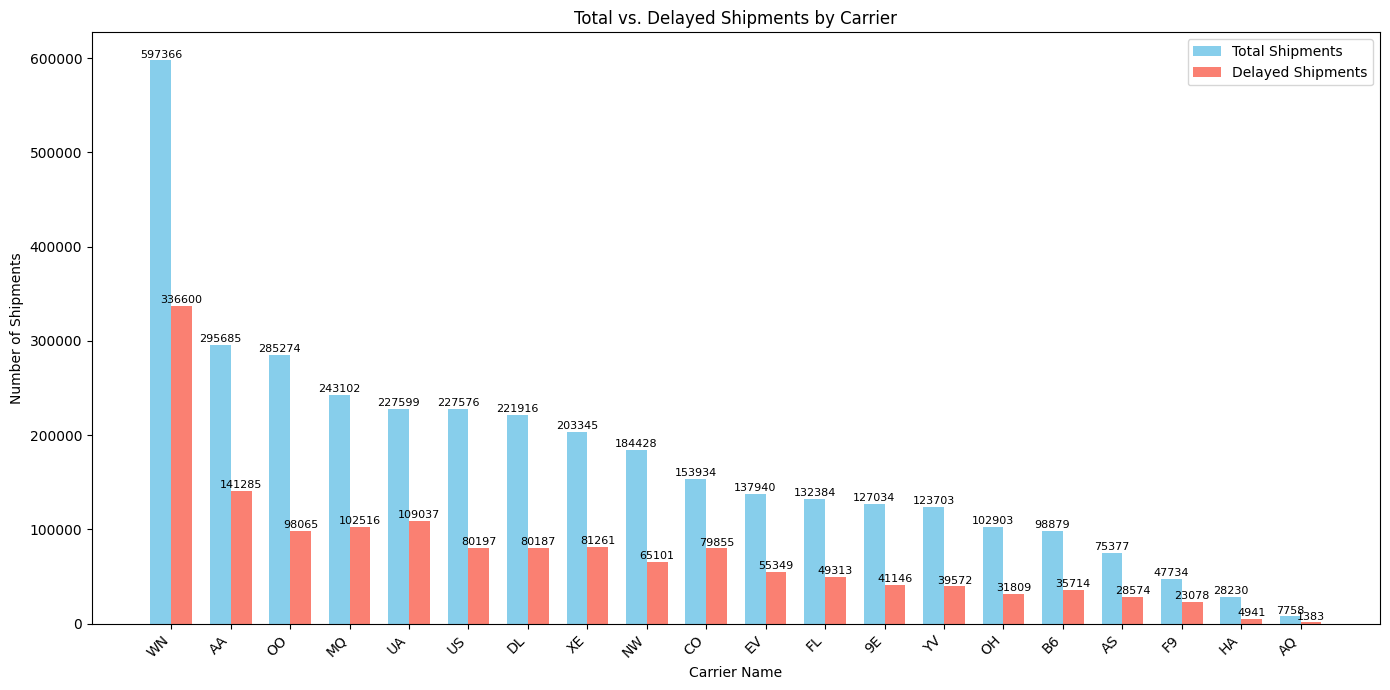

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.35
index = np.arange(len(carrier_comparison_df))

bar1 = ax.bar(index, carrier_comparison_df['Total_Shipments'], bar_width, label='Total Shipments', color='skyblue')
bar2 = ax.bar(index + bar_width, carrier_comparison_df['Delayed_Shipments'], bar_width, label='Delayed Shipments', color='salmon')

ax.set_xlabel('Carrier Name')
ax.set_ylabel('Number of Shipments')
ax.set_title('Total vs. Delayed Shipments by Carrier')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(carrier_comparison_df.index, rotation=45, ha='right')
ax.legend()

for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{yval:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

/tmp/ipython-input-4168628797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=carrier_delayed_percentage.index, y=carrier_delayed_percentage.values, palette='rocket')


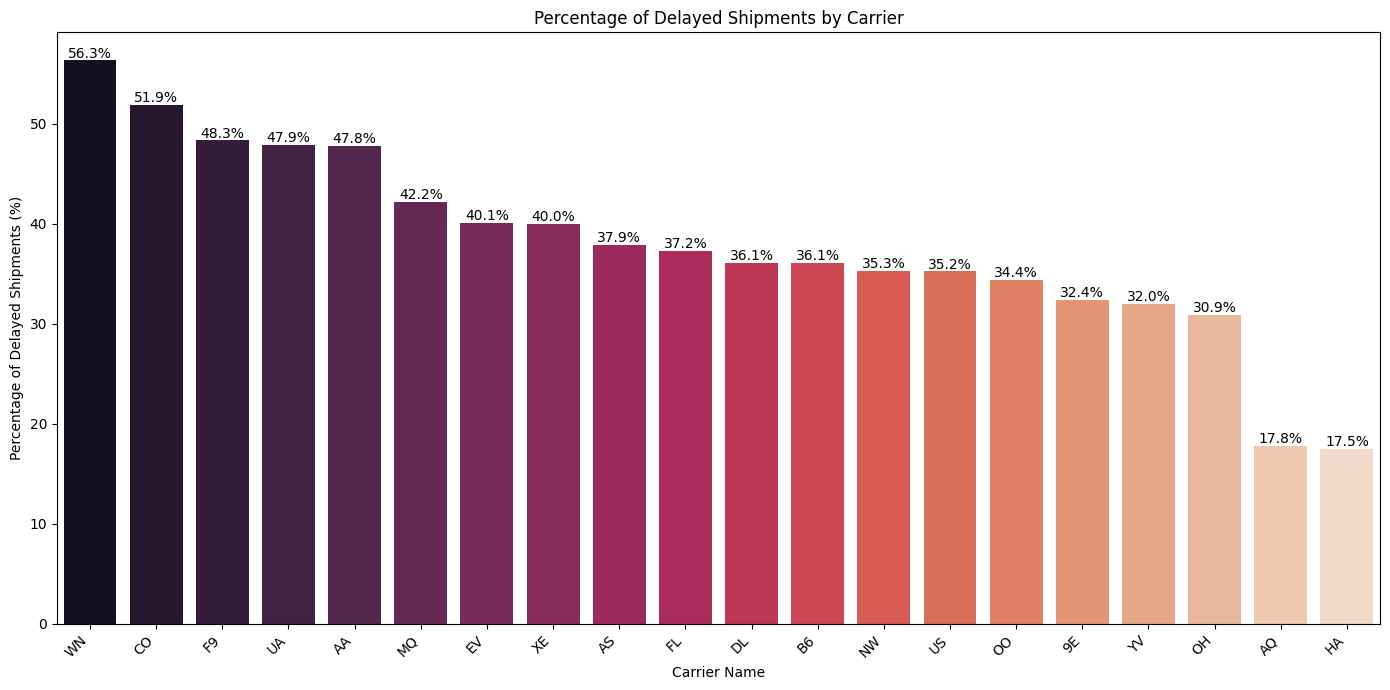

In [ ]:

carrier_delayed_percentage = (delayed_shipments_by_carrier / total_shipments_by_carrier) * 100

carrier_delayed_percentage = carrier_delayed_percentage.fillna(0).sort_values(ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=carrier_delayed_percentage.index, y=carrier_delayed_percentage.values, palette='rocket')
plt.title('Percentage of Delayed Shipments by Carrier')
plt.xlabel('Carrier Name')
plt.ylabel('Percentage of Delayed Shipments (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
daily_shipments = df.groupby(df.index).size()
daily_shipments_df = daily_shipments.to_frame(name='Total_Shipments')
display(daily_shipments_df.head())

,Total_Shipments
Shipment_Date,
2008-01-01,18623
2008-01-02,20442
2008-01-03,20462
2008-01-04,20160
2008-01-05,17610


## Fetch fedex stock data



In [ ]:
import yfinance as yf

ticker_symbol = 'FDX'

start_date = daily_shipments_df.index.min()
end_date = daily_shipments_df.index.max()

fedex_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

display(fedex_stock_data.head())

/tmp/ipython-input-3304250440.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fedex_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,FDX,FDX,FDX,FDX,FDX
Date,,,,,
2008-01-02,70.729149,72.707526,69.826149,72.707526,6514400
2008-01-03,71.673172,71.985120,70.860478,71.106752,2623000
2008-01-04,69.038055,71.221664,68.282825,71.213453,4317400
2008-01-07,68.537346,70.047814,67.847789,69.604525,3991900
2008-01-08,67.954475,69.530611,67.855971,69.013443,4566100


In [ ]:

fedex_stock_data = fedex_stock_data[['Close']]

fedex_stock_data = fedex_stock_data.rename(columns={'Close': 'FDX_Close'})

display(fedex_stock_data.head())

Price,FDX_Close
Ticker,FDX
Date,
2008-01-02,70.729149
2008-01-03,71.673172
2008-01-04,69.038055
2008-01-07,68.537346
2008-01-08,67.954475


In [ ]:

fedex_stock_data.columns = ['FDX_Close']

merged_df = daily_shipments_df.merge(fedex_stock_data, left_index=True, right_index=True, how='inner')

display(merged_df.head())

,Total_Shipments,FDX_Close
2008-01-02,20442,70.729149
2008-01-03,20462,71.673172
2008-01-04,20160,69.038055
2008-01-07,19762,68.537346
2008-01-08,19140,67.954475


In [ ]:

full_date_range = pd.date_range(start=merged_df.index.min(), end=merged_df.index.max(), freq='D')
missing_dates = full_date_range.difference(merged_df.index)

print("Missing dates in merged_df index:", missing_dates)

merged_df = merged_df.reindex(full_date_range).ffill()

print("\nChecking for null values after filling:")
display(merged_df.isnull().sum())

print("\nVerifying the index covers the complete date range:")
print("Start date:", merged_df.index.min())
print("End date:", merged_df.index.max())

Missing dates in merged_df index: DatetimeIndex(['2008-01-05', '2008-01-06', '2008-01-12', '2008-01-13',
               '2008-01-19', '2008-01-20', '2008-01-21', '2008-01-26',
               '2008-01-27', '2008-02-02', '2008-02-03', '2008-02-09',
               '2008-02-10', '2008-02-16', '2008-02-17', '2008-02-18',
               '2008-02-23', '2008-02-24', '2008-03-01', '2008-03-02',
               '2008-03-08', '2008-03-09', '2008-03-15', '2008-03-16',
               '2008-03-21', '2008-03-22', '2008-03-23', '2008-03-29',
               '2008-03-30', '2008-04-05', '2008-04-06', '2008-04-12',
               '2008-04-13', '2008-04-19', '2008-04-20', '2008-04-26',
               '2008-04-27', '2008-05-03', '2008-05-04', '2008-05-10',
               '2008-05-11', '2008-05-17', '2008-05-18', '2008-05-24',
               '2008-05-25', '2008-05-26', '2008-05-31', '2008-06-01',
               '2008-06-07', '2008-06-08', '2008-06-14', '2008-06-15',
               '2008-06-21', '2008-06-22'],

,0
Total_Shipments,0
FDX_Close,0



Verifying the index covers the complete date range:
Start date: 2008-01-02 00:00:00
End date: 2008-06-27 00:00:00


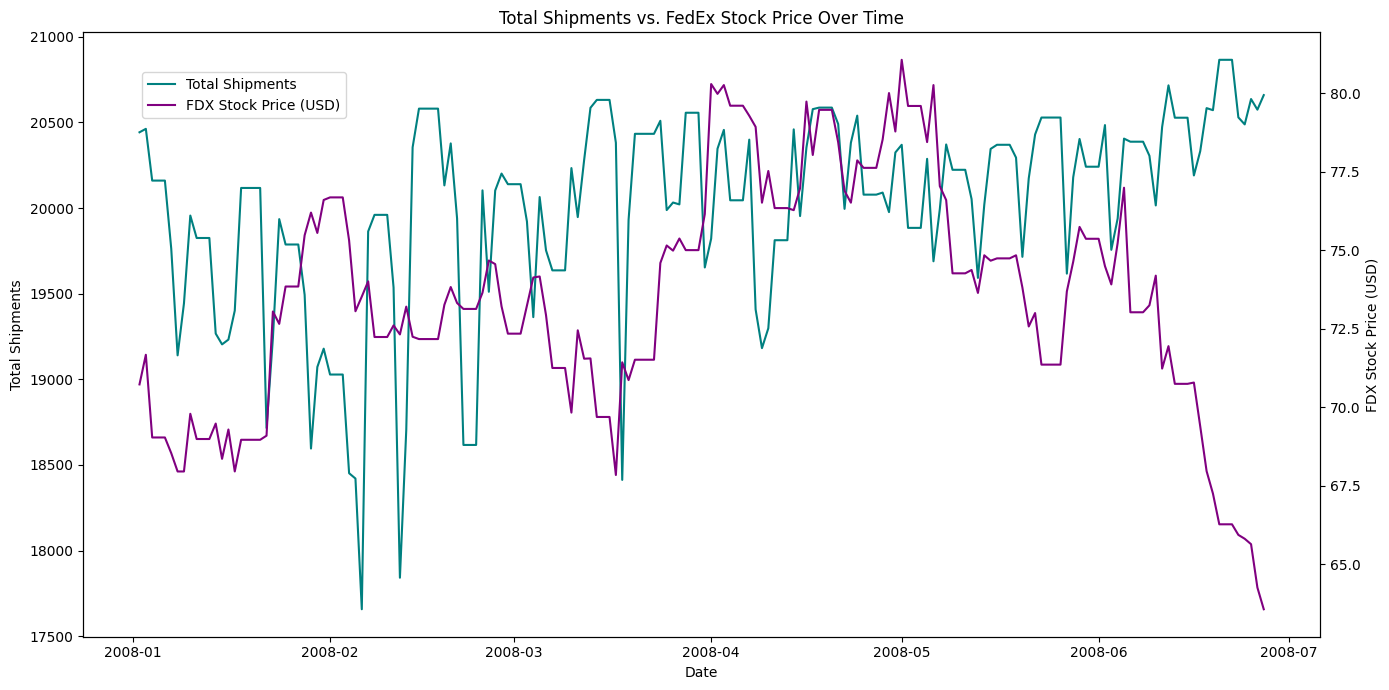

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(merged_df.index, merged_df['Total_Shipments'], color='teal', label='Total Shipments')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Shipments')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(merged_df.index, merged_df['FDX_Close'], color='purple', label='FDX Stock Price (USD)')
ax2.set_ylabel('FDX Stock Price (USD)')
ax2.tick_params(axis='y')

plt.title('Total Shipments vs. FedEx Stock Price Over Time')

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

## Interpretation of Correlation Coefficients

The bar chart shows the Pearson, Spearman, and Kendall correlation coefficients between the total number of shipments and the FedEx closing stock price.

*   **Pearson correlation**: Measures the linear relationship between two variables. A value close to 0 suggests a weak linear relationship. The Pearson correlation coefficient of **{{pearson_corr}}** indicates a very weak negative linear relationship between total shipments and FDX close. This means that as total shipments slightly increase, the FDX closing price tends to slightly decrease, but this relationship is not strong or consistent in a linear fashion.

*   **Spearman correlation**: Measures the monotonic relationship between two variables. It assesses how well the relationship between two variables can be described using a monotonic function. A value close to 0 suggests a weak monotonic relationship. The Spearman correlation coefficient of **{{spearman_corr}}** indicates a weak negative monotonic relationship. This means that there is a slight tendency for the FDX closing price to decrease as the total shipments increase, even if the relationship is not strictly linear.

*   **Kendall correlation**: Also measures the monotonic relationship between two variables, based on the number of concordant and discordant pairs. A value close to 0 suggests a weak monotonic relationship. The Kendall correlation coefficient of **{{kendall_corr}}** also indicates a weak negative monotonic relationship, similar to the Spearman correlation, confirming the slight tendency for FDX close to decrease as shipments increase.

All three correlation coefficients are close to zero and negative, suggesting a very weak to weak negative relationship between the total number of shipments and the FedEx closing stock price during this period. It's important to note that correlation does not imply causation. Other factors likely have a stronger influence on the stock price.

/tmp/ipython-input-1428133545.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlation_types, y=correlation_values, palette='viridis')


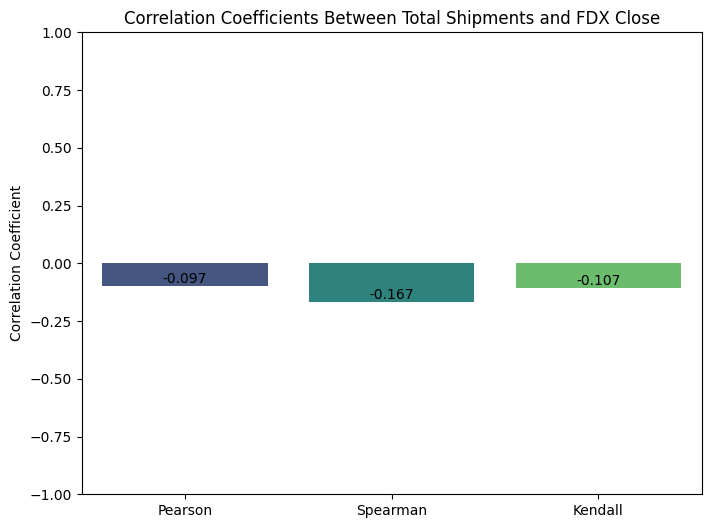

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_types = ['Pearson', 'Spearman', 'Kendall']
correlation_values = [pearson_corr, spearman_corr, kendall_corr]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=correlation_types, y=correlation_values, palette='viridis')
plt.title('Correlation Coefficients Between Total Shipments and FDX Close')
plt.ylabel('Correlation Coefficient')
plt.ylim([-1, 1]) 

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
kendall_corr = merged_df['Total_Shipments'].corr(merged_df['FDX_Close'], method='kendall')
print(f"Kendall correlation between Total Shipments and FDX Close: {kendall_corr}")

Kendall correlation between Total Shipments and FDX Close: -0.10734012329470799


In [ ]:
spearman_corr = merged_df['Total_Shipments'].corr(merged_df['FDX_Close'], method='spearman')
print(f"Spearman correlation between Total Shipments and FDX Close: {spearman_corr}")

Spearman correlation between Total Shipments and FDX Close: -0.16748767686658272


In [ ]:
pearson_corr = merged_df['Total_Shipments'].corr(merged_df['FDX_Close'], method='pearson')
print(f"Pearson correlation between Total Shipments and FDX Close: {pearson_corr}")

Pearson correlation between Total Shipments and FDX Close: -0.0965364634889021
